In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

Original Image


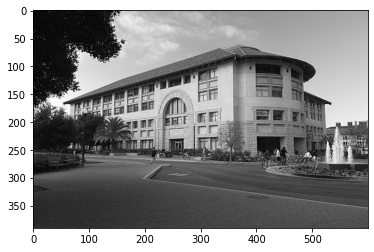

In [2]:
image_file = '/content/Image1.png'
input_image = imread(image_file)  # this is the array representation of the input image
[nx, ny] = np.shape(input_image)  # nx: height, ny: width, nz: colors (RGB)

print('Original Image')
plt.imshow(input_image, cmap='gray')

In [3]:
# Extracting each one of the x, y components
x_img, y_img = input_image[:, 0], input_image[:, 1]

In [4]:
Gx1 = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy1 = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

In [5]:
rows, columns = np.shape(input_image)  # we need to know the shape of the input grayscale image
sobel_filtered_image = np.zeros(shape=(rows, columns))  # initialization of the output image array (all elements are 0)

In [6]:
# Now we "sweep" the image in both x and y directions and compute the output
for i in range(rows - 2):
    for j in range(columns - 2):
        gx1 = np.sum(np.multiply(Gx1, input_image[i:i + 3, j:j + 3]))  # x direction
        gy1 = np.sum(np.multiply(Gy1, input_image[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx1 ** 2 + gy1 ** 2)  # calculate the "hypotenuse"

Image after applying Sobel Filter


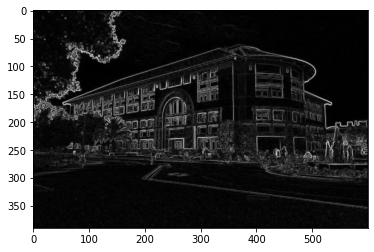

In [7]:
# Display the original image and the Sobel filtered image
print('Image after applying Sobel Filter')
plt.imshow(sobel_filtered_image, cmap='gray')

In [8]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt
from scipy import ndimage

Original Image


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until


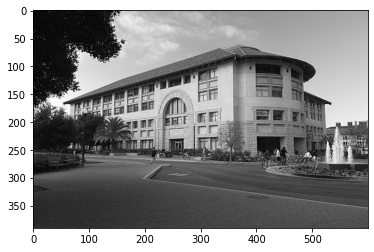

In [9]:
from skimage.color import rgb2gray
img = plt.imread('/content/Image1.png')
gray_img = rgb2gray(img)
log_img = ndimage.gaussian_laplace(gray_img, 1.4)
threshold =-0.05
log_final = np.zeros(log_img.shape)
w,h = log_img.shape

print('Original Image')
plt.imshow(img, cmap = plt.get_cmap('gray'))

Image after applying Laplacian of Gaussian


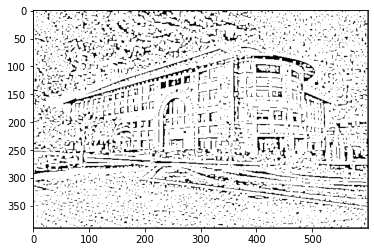

In [10]:
for x in range(1,w-1):
    for y in range(1,h-1):
        win = log_img[x-1:x+2,y-1:y+2]
        point = log_img[x,y]
        max1 = win.max()
        min1 = win.min()
        if point==0.0 and max1>0.0 and min1<0.0:
            zeroCross=1
        elif point>0.0:
            zeroCross= True if min1<0.0 else False
        else:
            zeroCross= True if min1<0.0 else False
        if (max1-min1)>threshold and zeroCross:
            log_final[x,y] = 1
plt.imshow(log_final, cmap = plt.get_cmap('gray'))
print('Image after applying Laplacian of Gaussian')
plt.show()

In [11]:
#3.a
def gaussian_filter(sigma = 1):
  size = int(size) // 2
  x, y = np.mgrid[-size:size + 1, -size:size + 1]
  normal = 1 / (2.0 * np.pi * sigma**2)
  g = np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
  return g

In [12]:
#3.b
def sobel_filter(img):
  Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
  Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

  [rows, cols] = np.shape(img)
  sobel_filtered_img = np.zeros(shape = (rows, cols))

  for i in range(rows - 2):
    for j in range(cols - 2):
      kx = np.sum(np.multiply(Kx, img[i:i + 3, j:j + 3]))
      ky = np.sum(np.multiply(Ky, img[i:i + 3, j:j + 3]))
      sobel_filtered_img[i + 1, j + 1] = np.sqrt(kx ** 2 + ky ** 2)
  return sobel_filtered_img

In [13]:
#3.c
def non_max_suppression(img, D):
  rows, cols = img.shape
  Z = np.zeros((rows, cols), dtype=np.int32)
  angle = D * 180. / np.pi
  angle[angle < 0] += 180

  for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        q = 255
        r = 255

        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
          q = img[i, j+1]
          r = img[i, j-1]                            

        elif (22.5 <= angle[i,j] < 67.5):
          q = img[i+1, j-1]
          r = img[i-1, j+1]

        elif (67.5 <= angle[i,j] < 112.5):
          q = img[i+1, j]
          r = img[i-1, j]

        elif (112.5 <= angle[i,j] < 157.5):
          q = img[i-1, j-1]
          r = img[i+1, j+1]

        if (img[i,j] >= q) and (img[i,j] >= r):
          Z[i,j] = img[i,j]
        else:
          Z[i,j] = 0

  return Z

In [14]:
#3.d
def  hysteresis_thresh(weak_pixel, strong_pixel, img):
  rows, cols = img.shape
  weak = weak_pixel
  strong = strong_pixel

  for i in range(1, rows - 1):
    for j in range(1, cols - 1):
      if (img[i, j] == weak):
        if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
            or (img[i, j-1] == strong) or (img[i, j+1] == strong)
            or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
          img[i, j] = strong
        else:
          img[i, j] = 0
  return img